# Missing Values Imputation in Time Series Data  

Handling missing values is a crucial step in data preprocessing, especially when working with time series data. Below, we discuss the key considerations and methods for imputing missing values.  

## Why Missing Values Imputation is Important  

- Missing values can lead to inaccurate model predictions.  
- Improper handling can damage the integrity and structure of the data.  
- For time series data, trends and seasonality make imputation more complex compared to other types of data.  

## Limitations of Common Imputation Techniques  

- **Global Mean, Median, or Mode:**  
  - Often used in traditional datasets.  
  - Does not consider the temporal structure of time series data.  
  - Can disrupt trends, seasonality, and the natural flow of data.  

## Challenges in Imputing Time Series Data  

- Time series data often follows specific patterns (daily, weekly, monthly, yearly).  
- Imputation methods need to preserve these patterns to maintain data consistency.  
- Failing to do so may result in poor performance of machine learning models trained on the data.  

## Specialized Techniques for Time Series Imputation  

We will explore the following methods:  

1. **Forward Filling and Backward Filling:**  
   - Replace missing values with the previous or next available value.  
   - Works well for short gaps but can fail if trends change rapidly.  

2. **Interpolation Methods:**  
   - Linear, Polynomial, or Spline interpolation to estimate missing values.  
   - Suitable for capturing trends in smooth datasets.  

3. **Rolling Averages or Moving Windows:**  
   - Fill values using averages over a specific rolling window.  
   - Helps in maintaining local trends.  

4. **Seasonal Decomposition:**  
   - Break down time series into trend, seasonal, and residual components.  
   - Impute missing values based on seasonal or trend patterns.  

5. **Machine Learning-Based Approaches:**  
   - Use models like KNN, Random Forests, or specialized algorithms to predict missing values.  
   - Leverage temporal features to ensure accurate imputation.  

6. **Advanced Time Series Models:**  
   - Use ARIMA, Prophet, or deep learning models like LSTMs for imputation.  
   - Particularly useful for datasets with complex seasonality and long gaps.  

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
import datetime as datetime

import plotly.express as px


In [2]:
mpl.rcParams['figure.figsize'] = [10, 7]
# mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')

In [4]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [5]:
# concatenate the columns of year, month, day and hour 
df['date'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'], hour=row['hour']), axis=1)


In [6]:
# drop the columns year, month, day and hou
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
# shif the column to the first position
date = df['date']
df.drop(columns=['date'], inplace=True)
df.insert(0, 'date', date)
# swap the columns



In [7]:
df.head()

,date,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   PM2.5    34285 non-null  float64       
 3   PM10     34408 non-null  float64       
 4   SO2      34334 non-null  float64       
 5   NO2      33830 non-null  float64       
 6   CO       33052 non-null  float64       
 7   O3       33850 non-null  float64       
 8   TEMP     35011 non-null  float64       
 9   PRES     35014 non-null  float64       
 10  DEWP     35011 non-null  float64       
 11  RAIN     35013 non-null  float64       
 12  wd       34924 non-null  object        
 13  WSPM     35021 non-null  float64       
 14  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


In [9]:
# check for missing values
df.isnull().sum()

date          0
No            0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [10]:
# take temp for analysis
df.query('TEMP != TEMP')

,date,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,2015-01-27 20:00:00,16749,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16813,2015-01-30 13:00:00,16814,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16829,2015-01-31 05:00:00,16830,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16873,2015-02-02 01:00:00,16874,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16883,2015-02-02 11:00:00,16884,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16930,2015-02-04 10:00:00,16931,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16933,2015-02-04 13:00:00,16934,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17007,2015-02-07 15:00:00,17008,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17030,2015-02-08 14:00:00,17031,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17052,2015-02-09 12:00:00,17053,87.0,87.0,82.0,53.0,1600.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling


In [11]:
# Checking the null values in PM2.5 
df[df['PM2.5'].isnull()]


,date,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
752,2013-04-01 08:00:00,753,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1005.9,-3.2,0.0,NW,7.2,Dingling
753,2013-04-01 09:00:00,754,NaN,NaN,NaN,NaN,NaN,NaN,10.6,1007.0,-3.5,0.0,NNW,4.5,Dingling
754,2013-04-01 10:00:00,755,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1007.8,-3.6,0.0,NNW,4.5,Dingling
755,2013-04-01 11:00:00,756,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1007.7,-4.9,0.0,NNE,4.0,Dingling
756,2013-04-01 12:00:00,757,NaN,NaN,NaN,NaN,NaN,NaN,15.3,1007.9,-5.7,0.0,NE,5.0,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,2017-02-20 15:00:00,34864,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling
34864,2017-02-20 16:00:00,34865,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,2017-02-20 18:00:00,34867,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34883,2017-02-21 11:00:00,34884,NaN,NaN,26.0,68.0,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling


In [12]:
# plotting the grph for how the null values are looks like in a graph
fig = px.line(df, x='date', y='PM2.5', title='PM2.5 concentration over time')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()



In [13]:
# plot same for the temp
fig = px.line(df, x='date', y='TEMP', title='Temperature over time')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In the case of missing values we clearly see that the graph is discontinous at that point. Let's dive futher and explore the techiniques of filling missing values.

In [14]:
# set the date as index
df.set_index('date', inplace=True)
# select the data between 2015-02-02 to 2015-02-04


In [15]:
df.loc['2015-02-02':'2015-02-04']


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2015-02-02 00:00:00,16873,67.0,67.0,32.0,40.0,2600.0,11.0,-4.0,1025.0,-19.5,0.0,NW,1.3,Dingling
2015-02-02 01:00:00,16874,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 02:00:00,16875,65.0,65.0,17.0,46.0,2600.0,3.0,-6.0,1023.0,-19.7,0.0,NNW,0.1,Dingling
2015-02-02 03:00:00,16876,75.0,75.0,18.0,50.0,2900.0,3.0,-6.0,1023.0,-19.4,0.0,NNW,2.3,Dingling
2015-02-02 04:00:00,16877,96.0,96.0,19.0,53.0,3600.0,2.0,-6.0,1023.0,-19.0,0.0,NW,1.5,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 19:00:00,16940,4.0,20.0,2.0,2.0,200.0,88.0,3.0,1023.0,-15.2,0.0,NNW,4.0,Dingling
2015-02-04 20:00:00,16941,5.0,12.0,3.0,2.0,200.0,87.0,2.0,1026.0,-15.5,0.0,NNW,3.5,Dingling
2015-02-04 21:00:00,16942,5.0,7.0,3.0,2.0,200.0,84.0,2.0,1022.0,-14.6,0.0,N,3.1,Dingling


In [16]:
# Create one more dataframe for dropping the null values (Reason for droping this is to check the autocorrelation; Correlation between the same variable over time it will help to understand how the data correlated with the previous week, month, year, etc)

df_clean = df.copy()
df_clean.dropna(inplace=True)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

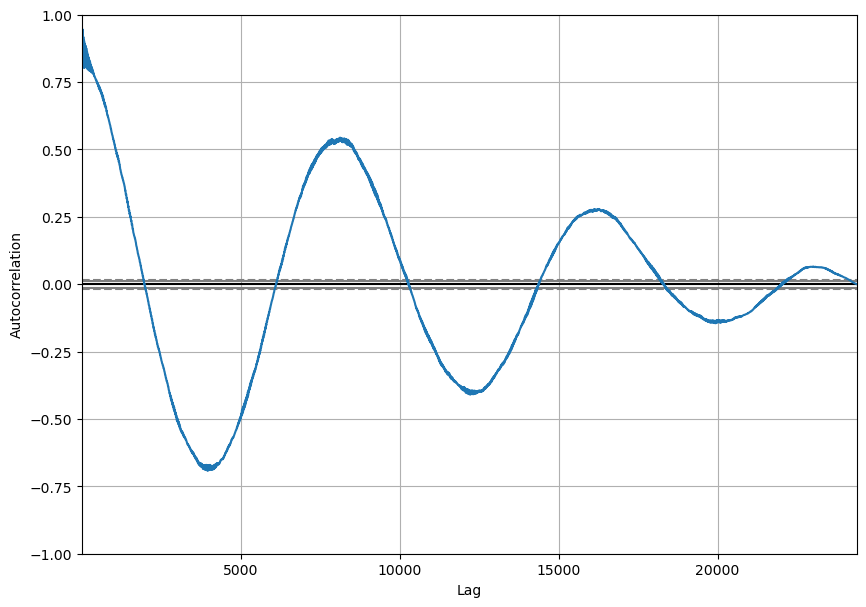

In [17]:
# plot the autocorrelation for the TEMP using df_clean
pd.plotting.autocorrelation_plot(df_clean['2014':'2016']['TEMP'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

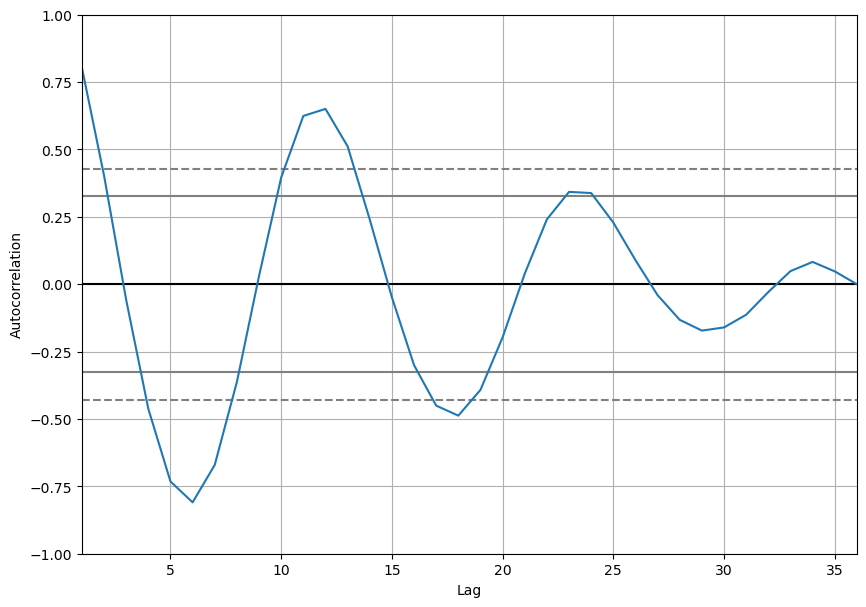

In [18]:
pd.plotting.autocorrelation_plot(df_clean['2014':'2016']['TEMP'].resample('ME').mean())

In the two graphs above, we can clearly observe peaks occurring at regular intervals, indicating that the data follows a seasonality pattern, specifically a yearly seasonality pattern. Additionally, the first graph is based on hourly data, which explains why the x-axis values cover a wide range. This will give an idea that I can impute the data from last year same date. Simiilaryly there were two lines which represents the confidence score line one is 90% and another one is 95% which shows the very high correlation between the two time intervals.

### Lag Plot Fucntion (used for plotting lag plots)
lag= 1 means I am comparing the current time period with one prior period and comparing how the correlated it. Example: Our Data is hourly Data and we see the below graph it's higly correlated with the preious hour.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

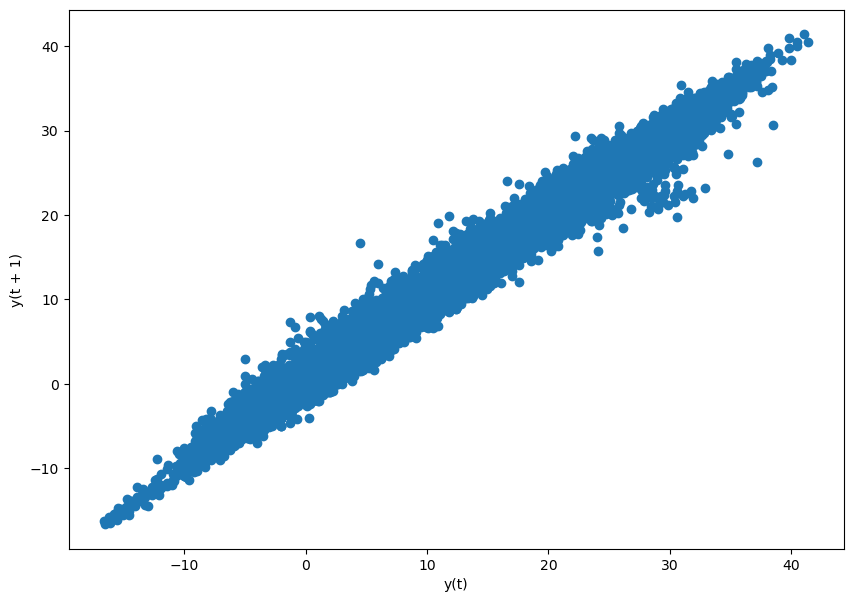

In [19]:
#  Now use the original data
pd.plotting.lag_plot(df['TEMP'], lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

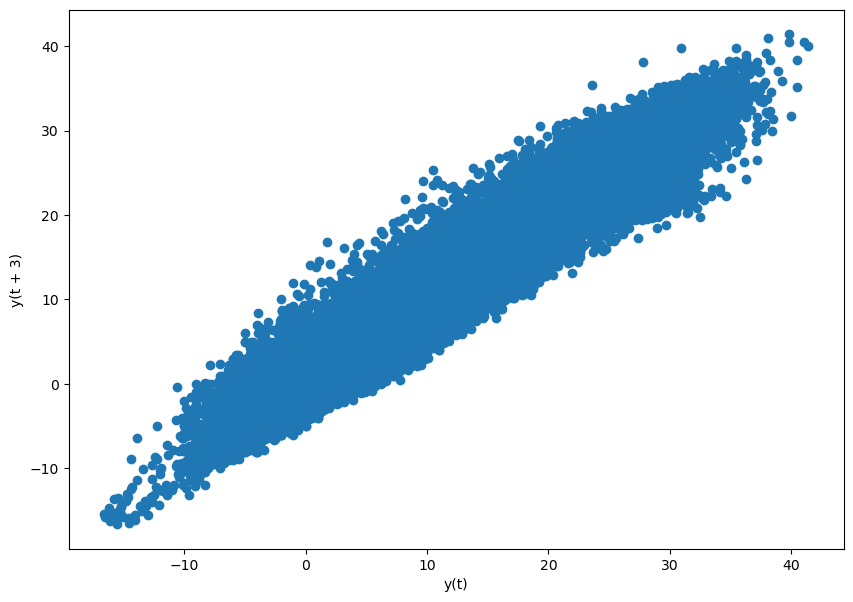

In [20]:
pd.plotting.lag_plot(df['TEMP'], lag=3)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

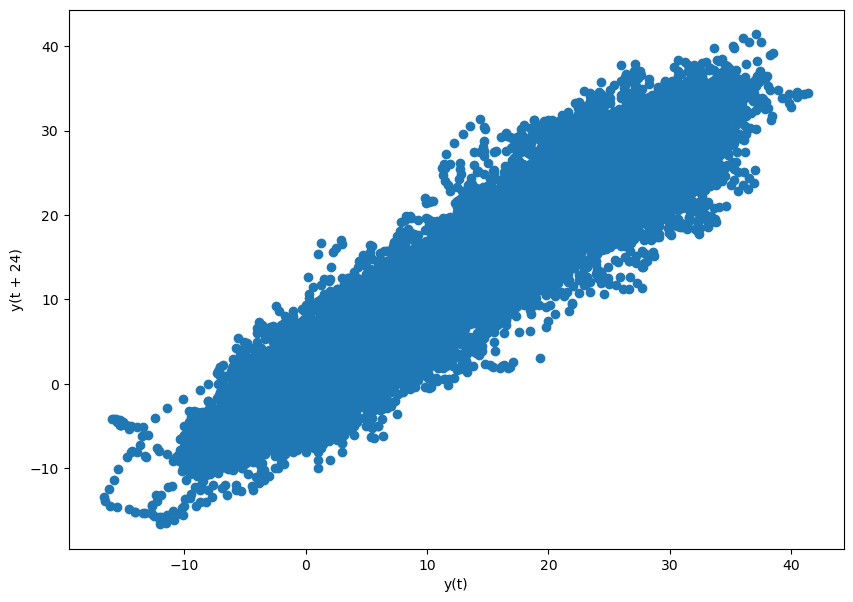

In [21]:
pd.plotting.lag_plot(df['TEMP'], lag=24) 

In all the above thee graph we see that the correlation is reducing with increasing lags even though there is a positive correaltion.

<Axes: xlabel='y(t)', ylabel='y(t + 8760)'>

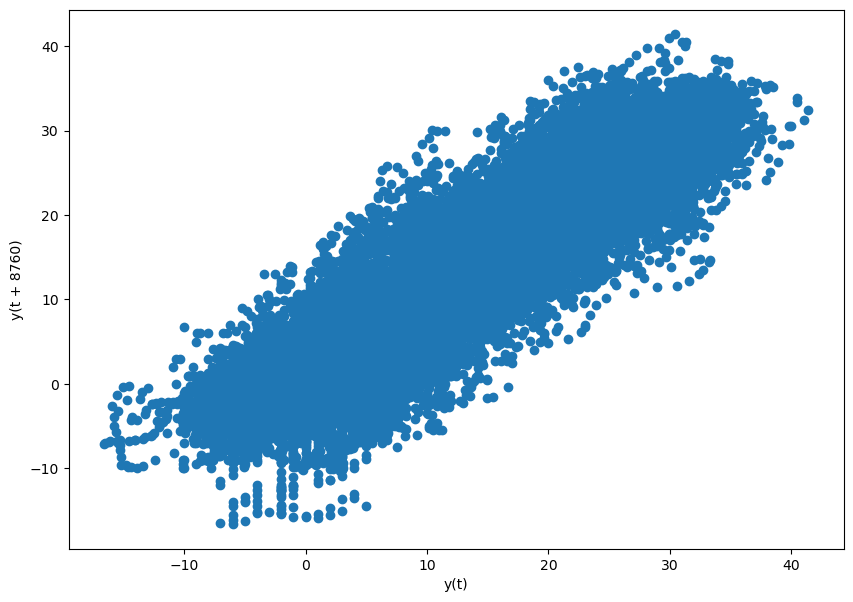

In [22]:
# Lets check for a year (how's the data correlated with the previous year)
pd.plotting.lag_plot(df['TEMP'], lag=24*365)

We see that there is linearity but not as strong as the what we observer in the lag=1.

In [23]:
# select the data for 2015-02-21 10 to 2015-02-21 20
df['2015-02-21 10:00:00':'2015-02-21 20:00:00']

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2015-02-21 10:00:00,17339,171.0,171.0,16.0,48.0,2400.0,6.0,1.0,1005.0,-1.1,0.0,SW,1.1,Dingling
2015-02-21 11:00:00,17340,172.0,172.0,16.0,45.0,2200.0,13.0,1.0,1006.0,-0.9,0.0,SSW,1.2,Dingling
2015-02-21 12:00:00,17341,164.0,164.0,16.0,46.0,2100.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 13:00:00,17342,175.0,175.0,16.0,46.0,2200.0,15.0,2.0,1006.0,-0.3,0.0,SW,1.6,Dingling
2015-02-21 14:00:00,17343,207.0,207.0,16.0,46.0,2300.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 15:00:00,17344,231.0,231.0,18.0,40.0,2200.0,32.0,4.0,1004.0,-8.7,0.0,W,9.6,Dingling
2015-02-21 16:00:00,17345,3.0,114.0,7.0,5.0,1100.0,88.0,4.0,1005.0,-12.5,0.0,NW,9.0,Dingling
2015-02-21 17:00:00,17346,24.0,227.0,2.0,3.0,1800.0,91.0,3.0,1009.0,-16.7,0.0,WNW,6.4,Dingling
2015-02-21 18:00:00,17347,40.0,351.0,2.0,2.0,1800.0,97.0,2.0,1010.0,-21.3,0.0,NW,7.3,Dingling


In [24]:
# assign the above select date into a dataframe
df_temp = df['2015-02-21 10:00:00':'2015-02-21 20:00:00'][['TEMP']]

In [25]:
df_temp

,TEMP
date,
2015-02-21 10:00:00,1.0
2015-02-21 11:00:00,1.0
2015-02-21 12:00:00,NaN
2015-02-21 13:00:00,2.0
2015-02-21 14:00:00,NaN
2015-02-21 15:00:00,4.0
2015-02-21 16:00:00,4.0
2015-02-21 17:00:00,3.0
2015-02-21 18:00:00,2.0


In [26]:
# As we saw previously the data is highly correlated at lag=1 so we can use the previous value to fill the missing value
df_temp['TEMP_FFILL']=df_temp['TEMP'].ffill()


In [27]:
df_temp

,TEMP,TEMP_FFILL
date,,
2015-02-21 10:00:00,1.0,1.0
2015-02-21 11:00:00,1.0,1.0
2015-02-21 12:00:00,NaN,1.0
2015-02-21 13:00:00,2.0,2.0
2015-02-21 14:00:00,NaN,2.0
2015-02-21 15:00:00,4.0,4.0
2015-02-21 16:00:00,4.0,4.0
2015-02-21 17:00:00,3.0,3.0
2015-02-21 18:00:00,2.0,2.0


In [28]:
# Backward fill ; which is not a good idea to fill the missing value
df_temp['TEMP_BFILL']=df_temp['TEMP'].bfill()


In [29]:
df_temp

,TEMP,TEMP_FFILL,TEMP_BFILL
date,,,
2015-02-21 10:00:00,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0
2015-02-21 13:00:00,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0
2015-02-21 15:00:00,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0
2015-02-21 18:00:00,2.0,2.0,2.0


In [30]:
# Rolling mean to fill the missing value and round the value to 2 decimal places (taking the average of the previous 3 values)
df_temp['TEMP_RM']=df_temp['TEMP'].rolling(window=3, min_periods=1).mean()
df_temp['TEMP_RM']=df_temp['TEMP_RM'].round(2)



In [31]:
df_temp

,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_RM
date,,,,
2015-02-21 10:00:00,1.0,1.0,1.0,1.00
2015-02-21 11:00:00,1.0,1.0,1.0,1.00
2015-02-21 12:00:00,NaN,1.0,2.0,1.00
2015-02-21 13:00:00,2.0,2.0,2.0,1.50
2015-02-21 14:00:00,NaN,2.0,4.0,2.00
2015-02-21 15:00:00,4.0,4.0,4.0,3.00
2015-02-21 16:00:00,4.0,4.0,4.0,4.00
2015-02-21 17:00:00,3.0,3.0,3.0,3.67
2015-02-21 18:00:00,2.0,2.0,2.0,3.00


### Note: we have to run the rolling window only for those rows where the null values present not for all
but in the previous cell you can clearly see that it's runnign for all the rows.
Let's see how we well do it only for the "NaN" values 

In [32]:
# Apply the rolling function only to the null values in the 'TEMP' column
df_temp['TEMP_NEW_RM'] = df_temp['TEMP']  # Copy the original values
df_temp.loc[df_temp['TEMP'].isnull(), 'TEMP_NEW_RM'] = (df_temp['TEMP'].rolling(window=3, min_periods=1).apply(lambda x: x.mean()).round(2))


In [33]:
df_temp

,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_RM,TEMP_NEW_RM
date,,,,,
2015-02-21 10:00:00,1.0,1.0,1.0,1.00,1.0
2015-02-21 11:00:00,1.0,1.0,1.0,1.00,1.0
2015-02-21 12:00:00,NaN,1.0,2.0,1.00,1.0
2015-02-21 13:00:00,2.0,2.0,2.0,1.50,2.0
2015-02-21 14:00:00,NaN,2.0,4.0,2.00,2.0
2015-02-21 15:00:00,4.0,4.0,4.0,3.00,4.0
2015-02-21 16:00:00,4.0,4.0,4.0,4.00,4.0
2015-02-21 17:00:00,3.0,3.0,3.0,3.67,3.0
2015-02-21 18:00:00,2.0,2.0,2.0,3.00,2.0


In [34]:
df.loc[df_temp.index + pd.offsets.DateOffset(years=-1)]['TEMP']

date
2014-02-21 10:00:00    1.4
2014-02-21 11:00:00    2.4
2014-02-21 12:00:00    3.0
2014-02-21 13:00:00    3.8
2014-02-21 14:00:00    3.5
2014-02-21 15:00:00    3.6
2014-02-21 16:00:00    3.3
2014-02-21 17:00:00    2.8
2014-02-21 18:00:00    1.3
2014-02-21 19:00:00    0.7
2014-02-21 20:00:00    1.2
Name: TEMP, dtype: float64

In [35]:
# Let's try to impute the values from the previous year of same day as the data follow yearly seasonality as well

# For this task reset the index first
df_temp = df_temp.reset_index()

In [36]:
df_temp

,date,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_RM,TEMP_NEW_RM
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.00,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.00,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.00,1.0
3,2015-02-21 13:00:00,2.0,2.0,2.0,1.50,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.00,2.0
5,2015-02-21 15:00:00,4.0,4.0,4.0,3.00,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.00,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.67,3.0
8,2015-02-21 18:00:00,2.0,2.0,2.0,3.00,2.0
9,2015-02-21 19:00:00,1.0,1.0,1.0,2.00,1.0


In [38]:
df_temp['TEMP_PREVY']=df_temp.apply(lambda x: df.loc[x['date'] - pd.offsets.DateOffset(years = -1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis=1)

In [39]:
df_temp

,date,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_RM,TEMP_NEW_RM,TEMP_PREVY
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.00,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.00,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.00,1.0,1.9
3,2015-02-21 13:00:00,2.0,2.0,2.0,1.50,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.00,2.0,4.9
5,2015-02-21 15:00:00,4.0,4.0,4.0,3.00,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.00,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.67,3.0,3.0
8,2015-02-21 18:00:00,2.0,2.0,2.0,3.00,2.0,2.0
9,2015-02-21 19:00:00,1.0,1.0,1.0,2.00,1.0,1.0
